## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scripts.helper import currency

## Importing the dataset

In [2]:
df_train = pd.read_csv('data/Train_cleaned.csv')

## Graphical Insides

In [3]:
#sns.pairplot(df_train, diag_kind='kde')
#plt.show()

### Correlations

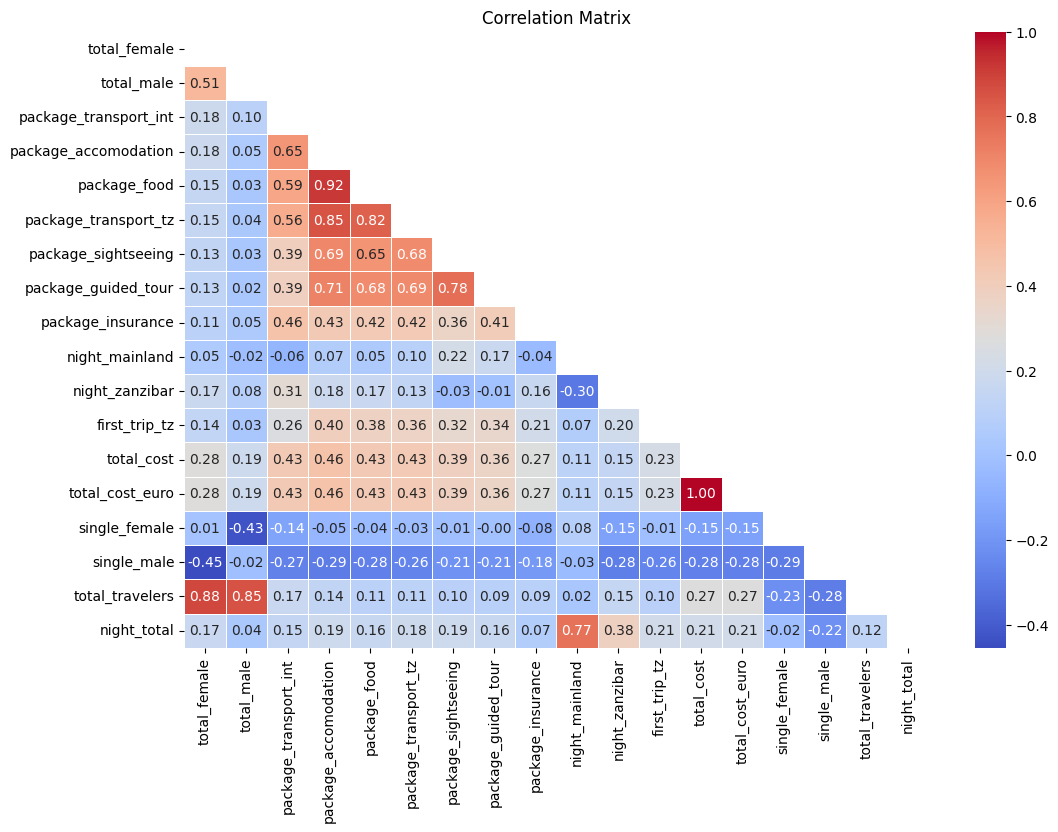

In [4]:
corr=df_train.corr(numeric_only=True)
mask=np.triu(corr)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Top Countries

In [5]:
df_train.country.nunique()

97

In [6]:
df_train.country.value_counts()

country
UNITED STATES OF AMERICA    625
UNITED KINGDOM              423
ITALY                       362
FRANCE                      251
KENYA                       201
                           ... 
INDONESIA                     1
TRINIDAD TOBACCO              1
ANGOLA                        1
MONTENEGRO                    1
THAILAND                      1
Name: count, Length: 97, dtype: int64

In [7]:
df_train.country.value_counts().head(50)

country
UNITED STATES OF AMERICA            625
UNITED KINGDOM                      423
ITALY                               362
FRANCE                              251
KENYA                               201
SOUTH AFRICA                        195
GERMANY                             190
ZIMBABWE                            180
AUSTRALIA                           173
ZAMBIA                              138
SPAIN                               136
UGANDA                              102
CANADA                               90
NETHERLANDS                          86
INDIA                                65
CHINA                                55
SWITZERLAND                          53
JAPAN                                44
BURUNDI                              42
UNITED ARAB EMIRATES                 40
BELGIUM                              40
RWANDA                               34
SWEDEN                               29
DENMARK                              28
DEMOCRATIC REPUBLIC OF THE CONGO

Tanzianias is visited by people from 101 Countries. The most visitors are coming for the USA, followed by th UK and Italy.


#### Distribution

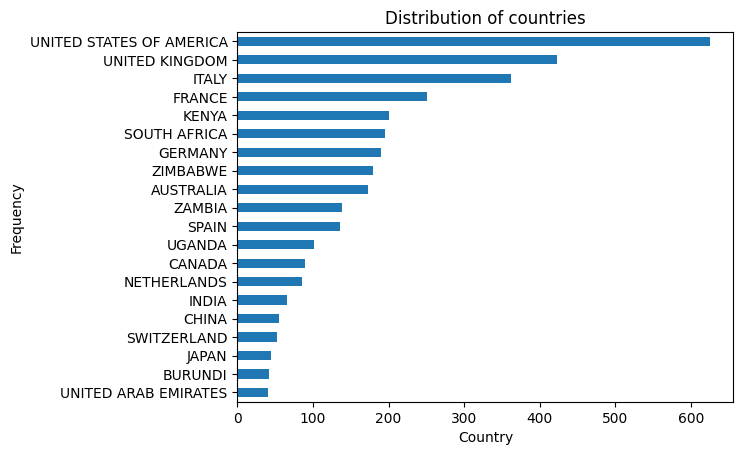

In [8]:
df_train['country'].value_counts().head(20).sort_values().plot(kind='barh')
plt.title("Distribution of countries")
plt.xlabel("Country")
plt.ylabel("Frequency");


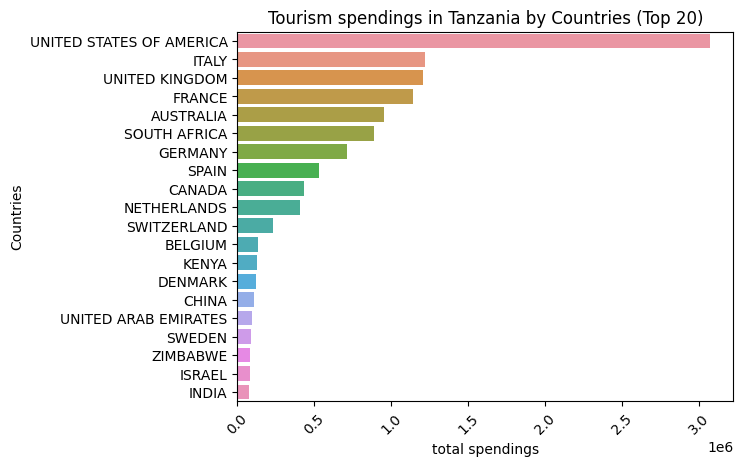

In [9]:
df_country = df_train.groupby(['country'])['total_cost_euro'].sum().rename("total_cost_by_country")
df_country= df_country.to_frame().reset_index()
df_country_sort= df_country.sort_values(['total_cost_by_country'],ascending=False).head(20)

sns.barplot(y='country', x='total_cost_by_country', data=df_country_sort)

plt.xticks(rotation=45)
plt.xlabel("total spendings")
plt.ylabel("Countries")
plt.title("Tourism spendings in Tanzania by Countries (Top 20)")
plt.show()


North America, Western-Europa, Australia , China , India,   South Africa, Kenya (neighbor), Zimbabwe (very close)

### Age Groups

#### Distribution

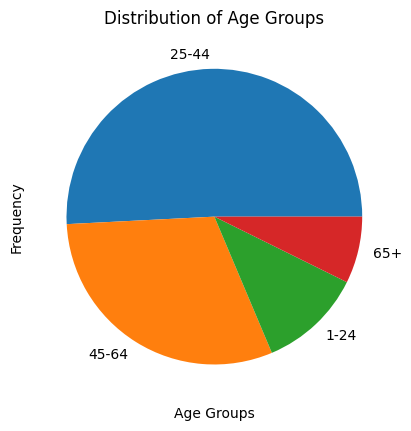

In [10]:
df_train['age_group'].value_counts().plot(kind='pie')
plt.title("Distribution of Age Groups")
plt.xlabel("Age Groups")
plt.ylabel("Frequency");

#### Spendings

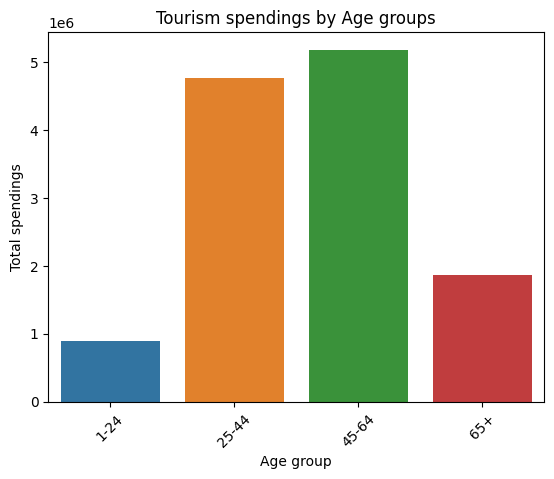

In [11]:
df_age= df_train.groupby(['age_group'])['total_cost_euro'].sum().rename("total_cost_by_age")
df_age= df_age.to_frame().reset_index()

sns.barplot(x='age_group', y='total_cost_by_age', data=df_age)

plt.xticks(rotation=45)
plt.ylabel("Total spendings")
plt.xlabel("Age group")
plt.title("Tourism spendings by Age groups")
plt.show()

### People traveled with

#### Distribution

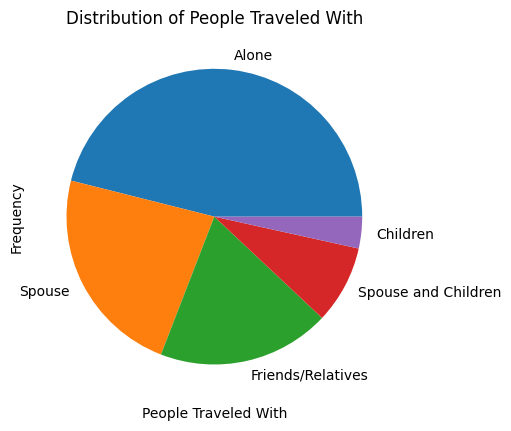

In [12]:
df_train['travel_with'].value_counts().plot(kind='pie') # bar, barh, 
plt.title("Distribution of People Traveled With")
plt.xlabel("People Traveled With")
plt.ylabel("Frequency");

#### Spendings

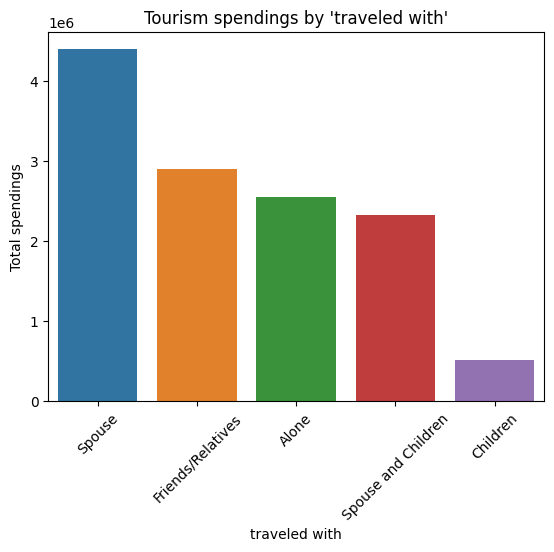

In [13]:
df_country = df_train.groupby(['travel_with'])['total_cost_euro'].sum().rename("travel_cost_by_travel_with").sort_values(ascending=False)
df_country= df_country.to_frame().reset_index()

sns.barplot(x='travel_with', y='travel_cost_by_travel_with', data=df_country)

plt.xticks(rotation=45)
plt.ylabel("Total spendings")
plt.xlabel("traveled with")
plt.title("Tourism spendings by 'traveled with'")
plt.show()

### Distribution of Information Sources

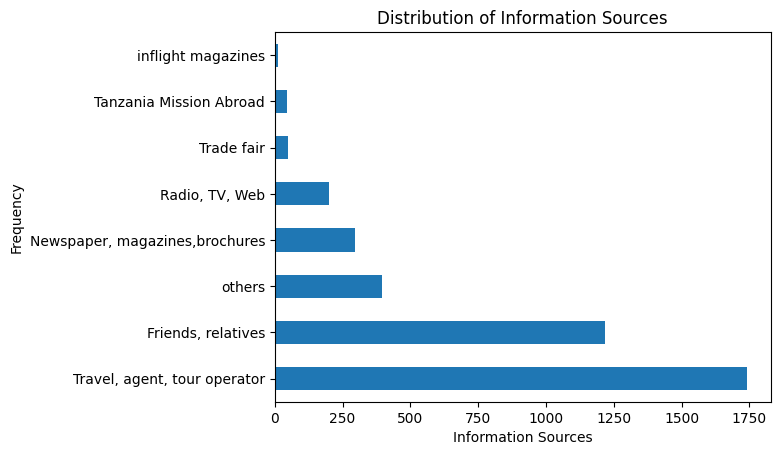

In [14]:
df_train['info_source'].value_counts().plot(kind='barh')
plt.title("Distribution of Information Sources")
plt.xlabel("Information Sources")
plt.ylabel("Frequency");

### Impressions

#### Distribution

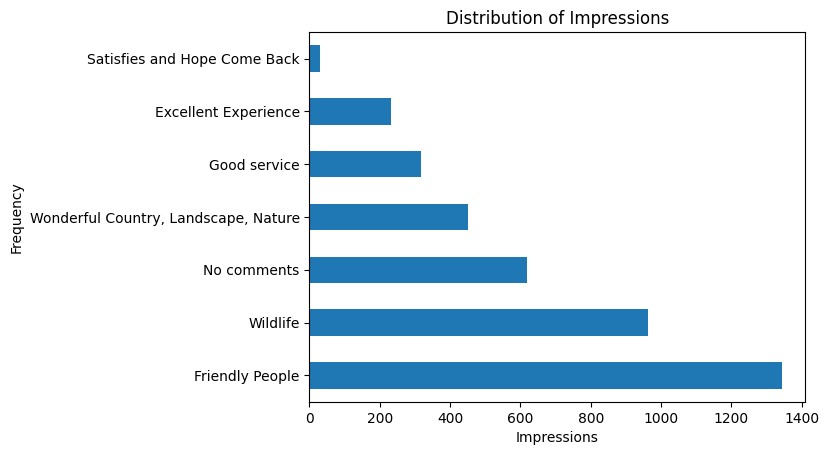

In [15]:
df_train['most_impressing'].value_counts().plot(kind='barh')
plt.title("Distribution of Impressions")
plt.xlabel("Impressions")
plt.ylabel("Frequency");

#### Spendings

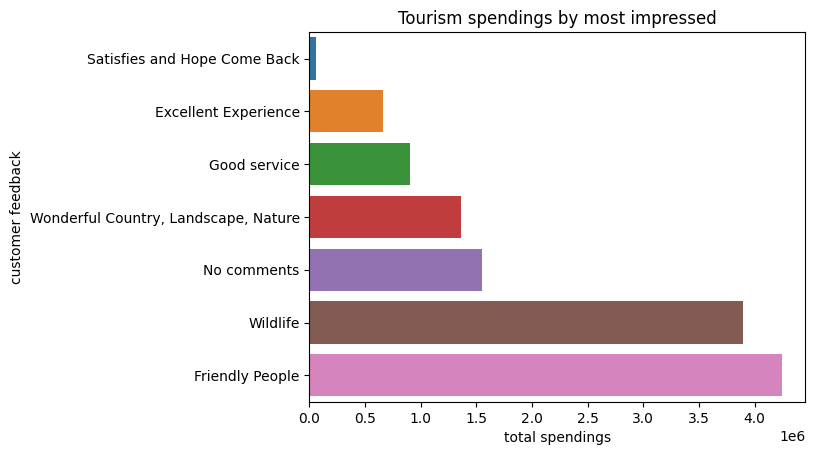

In [16]:
df_activity = df_train.groupby(['most_impressing'])['total_cost_euro'].sum().rename("travel_cost_by_most_impressing").sort_values()
df_activity= df_activity.to_frame().reset_index()

sns.barplot(y='most_impressing', x='travel_cost_by_most_impressing', data=df_activity)

plt.xlabel("total spendings")
plt.ylabel("customer feedback")
plt.title("Tourism spendings by most impressed")
plt.show()

### Main activities

#### Distribution

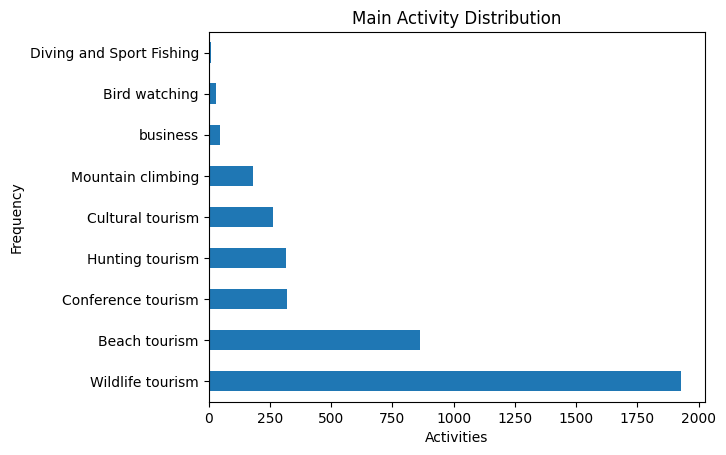

In [17]:
df_train['main_activity'].value_counts().plot(kind='barh')
plt.title("Main Activity Distribution")
plt.xlabel("Activities")
plt.ylabel("Frequency");

#### Spendings

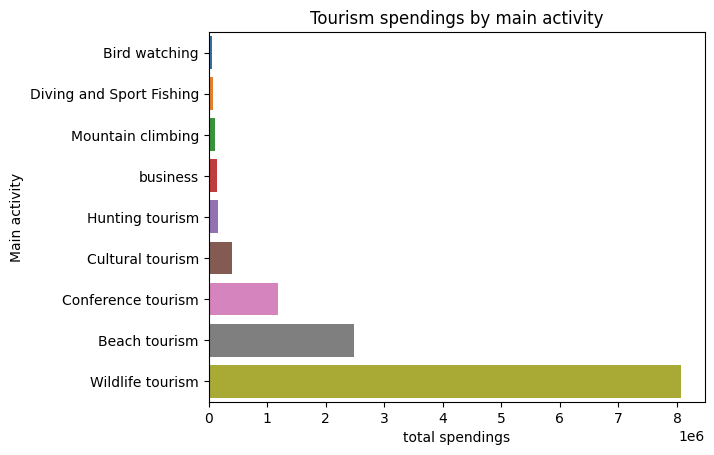

In [18]:
df_activity = df_train.groupby(['main_activity'])['total_cost_euro'].sum().rename("travel_cost_by_main_activity").sort_values()
df_activity= df_activity.to_frame().reset_index()

sns.barplot(y='main_activity', x='travel_cost_by_main_activity', data=df_activity)

plt.xlabel("total spendings")
plt.ylabel("Main activity")
plt.title("Tourism spendings by main activity")
plt.show()

Wildlife tourism is by far the biggest contributor to spends. 
A quick web search revealed that those tours can be categorizesed as followed: 2-3 days (from ~1100€), 5-7days (from ~2000€) or 10-14 (from ~3000-5000€) days.

https://www.tourradar.com/de/i/tansania-wildlife-tour

The relation between Wildlife tourism and Beach Tourism looks strongly related to nights spend on Mainland and Zanzibar.

### Purpose of travel

#### Distribution

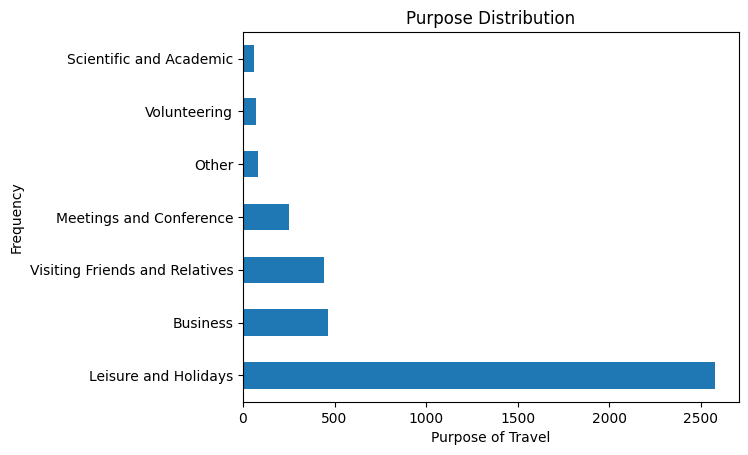

In [19]:
df_train['purpose'].value_counts().plot(kind='barh')
plt.title("Purpose Distribution")
plt.xlabel("Purpose of Travel")
plt.ylabel("Frequency");

#### Spendings

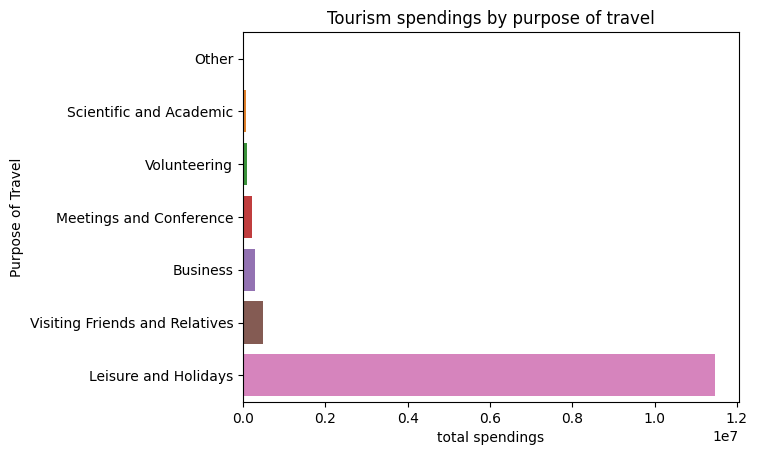

In [20]:
df_activity = df_train.groupby(['purpose'])['total_cost_euro'].sum().rename("travel_cost_by_purpose").sort_values()
df_activity= df_activity.to_frame().reset_index()

sns.barplot(y='purpose', x='travel_cost_by_purpose', data=df_activity)

plt.xlabel("total spendings")
plt.ylabel("Purpose of Travel")
plt.title("Tourism spendings by purpose of travel")
plt.show()

### Tour Arrangement 

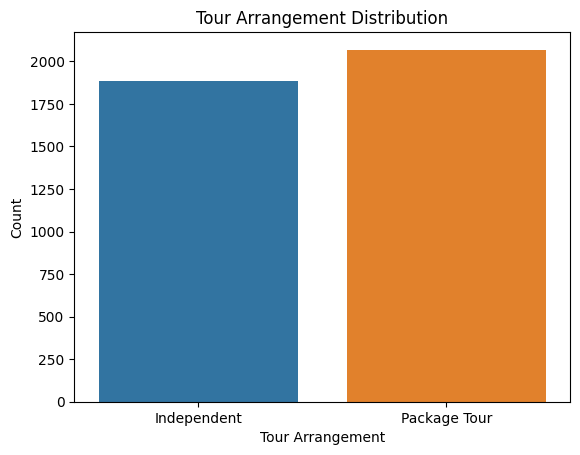

In [21]:
#fig,ax = plt.subplots(1,2,figsize=(16,16))

sns.countplot(x='tour_arrangement', data=df_train)
plt.title('Tour Arrangement Distribution')
plt.xlabel('Tour Arrangement')
plt.ylabel('Count')
plt.show()

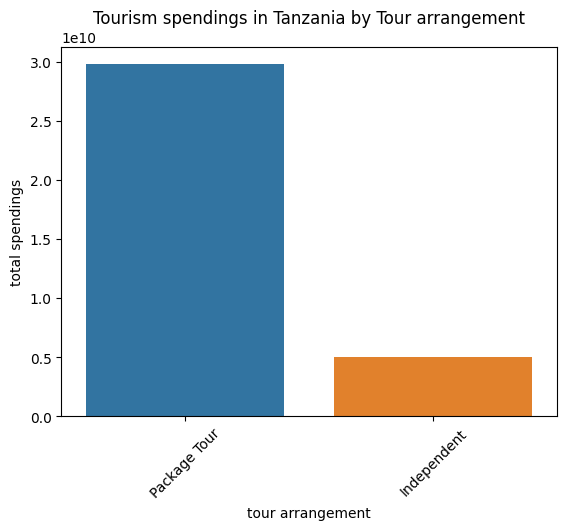

In [22]:
df_country_arrangment = df_train.groupby(['tour_arrangement'])['total_cost'].sum().rename("total_cost_by_country").sort_values(ascending=False)
df_country_arrangment= df_country_arrangment.to_frame().reset_index()

sns.barplot(x='tour_arrangement', y='total_cost_by_country', data=df_country_arrangment)

plt.xticks(rotation=45)
plt.ylabel("total spendings")
plt.xlabel("tour arrangement")
plt.title("Tourism spendings in Tanzania by Tour arrangement")
plt.show()

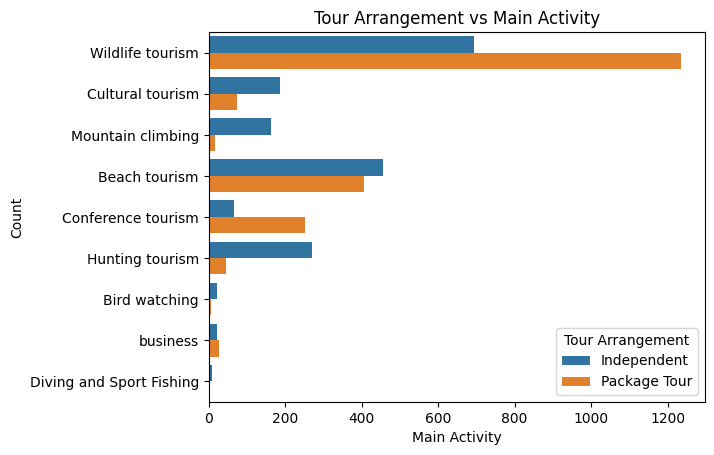

In [23]:
sns.countplot(y='main_activity', hue='tour_arrangement', data=df_train)
plt.title('Tour Arrangement vs Main Activity')
plt.xlabel('Main Activity')
plt.ylabel('Count')
plt.legend(title='Tour Arrangement')
plt.show()


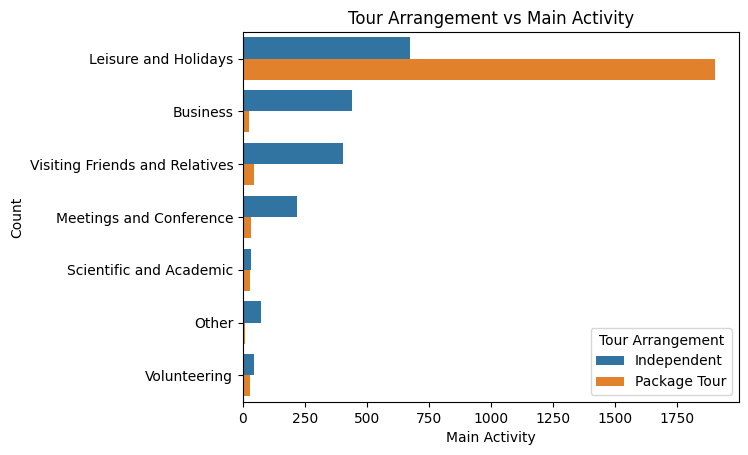

In [24]:

sns.countplot(y='purpose', hue='tour_arrangement', data=df_train)
plt.title('Tour Arrangement vs Main Activity')
plt.xlabel('Main Activity')
plt.ylabel('Count')
plt.legend(title='Tour Arrangement')
plt.show()

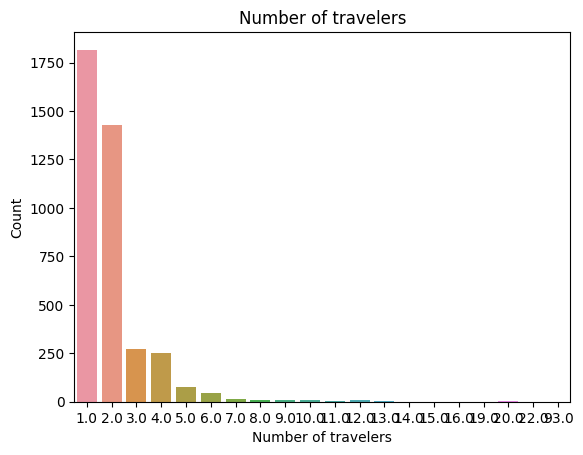

In [25]:
sns.countplot(x='total_travelers', data=df_train)
plt.title('Number of travelers')
plt.xlabel('Number of travelers')
plt.ylabel('Count')
plt.show()

## remove outlier

### Misc

Data ist highly skewed to the left. 

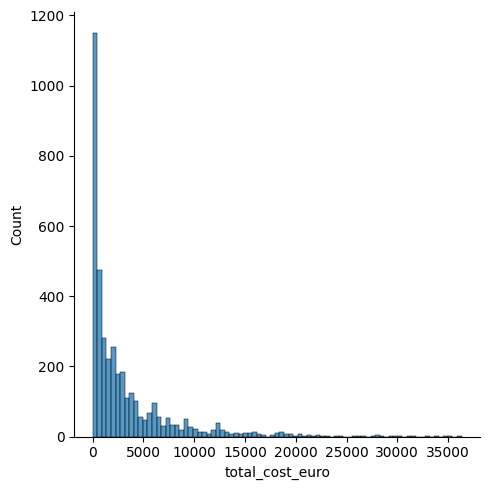

In [26]:
sns.displot(df_train, x='total_cost_euro');

Applying logarithm tranformation to total_cost_euro.

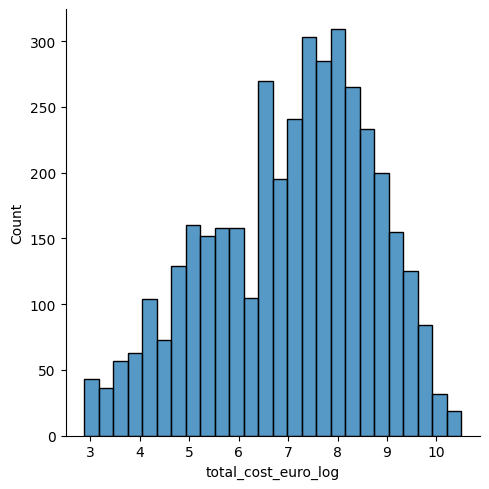

In [27]:
df_train['total_cost_euro_log'] = df_train.total_cost_euro.apply(lambda x: np.log(x));
sns.displot(df_train, x='total_cost_euro_log');

In [28]:
df_train.to_csv('data/Train_cleaned_log_transformed.csv')